<a href="https://colab.research.google.com/github/novia-aa/MNIST-IN-RNN/blob/main/MNIST_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install keras #install API
from keras.datasets import mnist
import numpy as np

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
# 匯入資料

(x_train_image,y_train_label),(x_test_image,y_test_label)=mnist.load_data()
print('train data= ',len(x_train_image))
print('test data=', len(x_test_image))

11501568/11490434 [==============================] - 0s 0us/step
train data=  60000
test data= 10000


Figure(432x288)


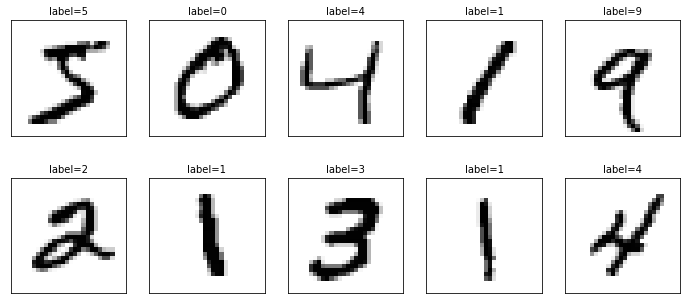

In [8]:
import matplotlib.pyplot as plt 

# 建立函數要來畫多圖的
def plot_images_labels_prediction(images,labels,prediction,idx,num=10): 
  
  # 設定顯示圖形的大小
  fig= plt.gcf() #得到當前的 figure
  print(fig)
  fig.set_size_inches(12,14)

  # 最多25張
  if num>25:num=25

  # 一張一張畫
  for i in range(0,num):

    # 建立子圖形5*5(五行五列)
    ax=plt.subplot(5,5,i+1)

    # 畫出子圖形
    ax.imshow(images[idx],cmap='binary')

    # 標題和label
    title="label=" +str(labels[idx])

    # 如果有傳入預測結果也顯示
    if len(prediction)>0:
      title+=",predict="+str(prediction[idx])

    # 設定子圖形的標題大小
    ax.set_title(title,fontsize=10)

    # 設定不顯示刻度
    ax.set_xticks([])
    ax.set_yticks([])  
    idx+=1
  plt.show()  
  
plot_images_labels_prediction(x_train_image,y_train_label,[],0,10)  

In [11]:
# pre-processing
# 所以要把二維的圖片矩陣先轉換成一維
x_Train=x_train_image.reshape(60000,784).astype('float32')
x_Test=x_test_image.reshape(10000,784).astype('float32')

# 由於是圖片最大的是255，所以全部除以255
x_Train_normalize=x_Train/255
x_Test_normalize=x_Test/255
from keras.utils import np_utils

# 標註資料(一位有效編碼)--------------------------------------
#1.能夠處理非連續型的分類變量。
#2.在一定程度上也擴充了特徵，讓特徵之間更稀疏
y_TrainOneHot=np_utils.to_categorical(y_train_label)
y_TestOneHot=np_utils.to_categorical(y_test_label)



In [21]:

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
# 建立模型
model = Sequential()
# 建立輸入層和隱藏層
model.add(Dense(units=256,input_dim=784,kernel_initializer='normal',activation='relu'))
model.add(Dropout(0.5))
# 定義隱藏層神經元個數256
# 輸入為28*28=784 個float 數字
# 使用 normal distribution 常態分布的亂數，初始化 weight權重 bias 偏差
# 定義激活函數為 relu

# 建立輸出層
model.add(Dense(units=10,kernel_initializer='normal',activation='softmax'))
# 定義輸出層為10個 (數字0~9)
# 也是使用常態分佈初始化
# 定義激活函數是 softmax
# 這裡建立的Dense 層，不用設定 input dim ，因為keras 會自動照上一層的256設定



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


In [22]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
# 模型訓練之前要用 compele 對模型進行設定
# loss 深度學習通常用 cross entropy 交叉嫡，訓練效果較好
# optimizer 設定訓練時依優化的方法，在深度學習使用 adam 最優化方法，最快收斂提高準確度
# metrics 設定評估模型的方式是 accuracy 準確率

# 開始訓練

train_history=model.fit(x=x_Train_normalize,y=y_TrainOneHot,
            validation_split=0.2,epochs=15,batch_size=200,verbose=2)
# x 是訓練資料
# y 是label 資料
# 設定參數 validation 切0.2起來驗證
# epoch=x 是訓練週期為x
# batch_size=x 每一批訓練x筆資料
# verbose =2 顯示訓練過程

# 所以以上的程式會執行x次
# 每一次執行x筆資料 ，總共訓練資料原本有60000*0.8=48000
# epoch 每一次訓練週期紀錄結果在 train_history 裡面

Epoch 1/15
240/240 - 2s - loss: 0.5351 - accuracy: 0.8485 - val_loss: 0.2304 - val_accuracy: 0.9377 - 2s/epoch - 10ms/step
Epoch 2/15
240/240 - 2s - loss: 0.2507 - accuracy: 0.9283 - val_loss: 0.1692 - val_accuracy: 0.9517 - 2s/epoch - 8ms/step
Epoch 3/15
240/240 - 2s - loss: 0.1947 - accuracy: 0.9432 - val_loss: 0.1357 - val_accuracy: 0.9612 - 2s/epoch - 8ms/step
Epoch 4/15
240/240 - 2s - loss: 0.1610 - accuracy: 0.9518 - val_loss: 0.1202 - val_accuracy: 0.9655 - 2s/epoch - 7ms/step
Epoch 5/15
240/240 - 2s - loss: 0.1403 - accuracy: 0.9582 - val_loss: 0.1114 - val_accuracy: 0.9689 - 2s/epoch - 8ms/step
Epoch 6/15
240/240 - 2s - loss: 0.1252 - accuracy: 0.9627 - val_loss: 0.1015 - val_accuracy: 0.9710 - 2s/epoch - 7ms/step
Epoch 7/15
240/240 - 2s - loss: 0.1165 - accuracy: 0.9666 - val_loss: 0.0945 - val_accuracy: 0.9726 - 2s/epoch - 7ms/step
Epoch 8/15
240/240 - 2s - loss: 0.1052 - accuracy: 0.9691 - val_loss: 0.0911 - val_accuracy: 0.9722 - 2s/epoch - 7ms/step
Epoch 9/15
240/240 - 2s

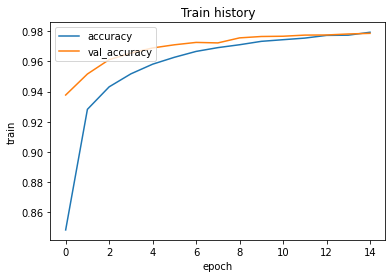

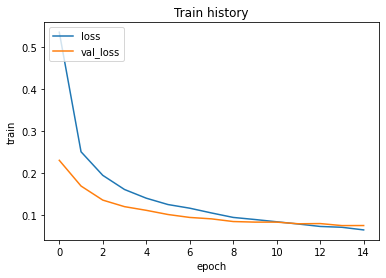

In [23]:
# 來把訓練過程畫出來


def show_train_history(train_history,train,validation):

  plt.plot(train_history.history[train])
  plt.plot(train_history.history[validation])
  plt.title('Train history')
  plt.ylabel('train')
  plt.xlabel('epoch')

  # 設置圖例在左上角
  plt.legend([train,validation],loc='upper left')
  plt.show()

show_train_history(train_history,'accuracy','val_accuracy')
show_train_history(train_history,'loss','val_loss')